# **Clusterização ou Agrupamento Hierárquico**

Assim como o KMeans, trata-se de um método baseado em distâncias. No entanto, a principal diferença é que o agrupamento é feito de forma hierárquica, ou seja, encontrando-se grupos dentro de grupos.

Essa abordagem é frequentemente comparada às classificações taxonômicas de seres vivos, onde você tem categorias mais amplas que se dividem em categorias mais específicas. O processo de agrupamento lembra a construção de uma árvore de decisão, onde o nó raiz representa todos os dados (o grupo total), e à medida que você avança na árvore, ocorrem subdivisões para formar clusters menores.

<img src="https://th.bing.com/th/id/R.df228cb781b9fc1f7bb98596396122be?rik=C2mrkHa9pmyM9A&riu=http%3a%2f%2fwww.statisticshowto.com%2fwp-content%2fuploads%2f2016%2f11%2fclustergram.png&ehk=b6Khl19cSqpqMrZKlr3zpc5KM8XsyCgUrnGJ40NNRLY%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1" width="700px">

A divisão de agrupamentos pode ser realizada de duas maneiras essenciais:

- **Agrupamento Divisivo** ou *Top-Down*: Inicialmente, todos os dados são atribuídos a um único cluster e, em seguida, são sequencialmente divididos até que cada observação se torne um cluster separado.

- **Agrupamento Aglomerativo** ou *Bottom-Up*: Inicialmente, cada dado é considerado um cluster independente. Em seguida, os clusters são sequencialmente mesclados até que todos os dados estejam agrupados em um único cluster.

Em outras palavras, esses algoritmos são o oposto um do outro. Vamos nos concentrar no funcionamento do algoritmo de Clusterização Aglomerativa.

**Como a Clusterização Aglomerativa funciona?**

1. Começa-se atribuindo cada observação a um *cluster de ponto único* (N clusters).
2. Encontra-se o par de clusters (pontos) mais próximos, ou seja, com maior similaridade, e os combina em um único cluster (N-1 clusters).
3. Repete-se o passo 2, encontrando o par de clusters (grupos de pontos) mais próximos e unindo-os em um único cluster (N-2 clusters).
4. Repete-se os passos 2 e 3 até que todos os pontos do conjunto de dados estejam agrupados em um único cluster.

No `scikit-learn`, a classe usada é o `AgglomerativeClustering`, cuja documentação pode ser encontrada [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) e [aqui](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).


## Formas de se Calcular distâncias (similaridades) entre pontos

As principais e mais conhecidas formas de se calcular a distância entre dois pontos:

- distância Euclidiana

$$d_E = \sqrt{\sum_{i=1}^N (x_{1,i} - x_{2,i})^2}$$

- distância Manhattan

$$d_M = \sum_{i=1}^N |x_{1,i} - x_{2,i}|$$

- distância de Minkowski

$$d_{Mp} = \Bigg(\sum_{i=1}^n |x_{1,i} - x_{2,i}|^p\Bigg)^{1/p}$$

## Formas de se calcular a similaridade entre dois grupos:

São chamadas técnicas de *ligação de clusters* ou *Linkage Algorithms*:

- **Ligação Simples** ou *Simple Linkage* - a distância entre os clusters é o mínimo das distâncias ou a distância entre os pontos mais próximos de cada cluster
- **Ligação Completa** ou *Complete Linkage* - é a máxima distância entre os elementos do cluster
- **Ligação Média** ou *Average Linkage* - É a distância média entre todos os pares de pontos de cada cluster
- **Método do Centróide** - Mínima distância entre os centroides de cada cluster
- **Método de Ward** - Combinação dos clusters de modo que o aumento de variância seja o menor possível, com o objetivo de minimizar o WCSS

<img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/01130934/june-30-hierarchical-clustering-infograph-for-blog-8.png">

## Visualização dos Clusters Hierárquicos - Dendogramas

Os dendrogramas são diagramas usados para representar a relação hierárquica entre objetos. São frequentemente usados para visualizar os diferentes agrupamentos em uma técnica de clusterização hierárquica.

Em termos simples, cada "nível" na árvore do dendrograma representa objetos que possuem semelhanças entre si. Quando fazemos um "corte" na árvore, estamos indicando que desejamos analisar apenas um determinado número de clusters. No entanto, o dendrograma por si só não nos indica qual número de clusters faz mais sentido; ele apenas nos mostra as possíveis formas de agrupamento nos dados.

**Exemplo**: No contexto da classificação de espécies de flores, podemos agrupá-las em diferentes níveis hierárquicos, dependendo dos objetivos do negócio. A imagem abaixo exemplifica a representação de diferentes níveis de agrupamento:

<img src="https://www.biorxiv.org/content/biorxiv/early/2019/10/25/817221/F1.large.jpg?width=800&height=600&carousel=1" width=900px>

Portanto, o dendrograma fornece uma visão hierárquica das relações entre os objetos, permitindo que escolhamos o número de clusters com base em nossos objetivos analíticos.

## Vantagens e Desvantagens da Clusterização Hierárquica

### **Vantagens**

- não existem hipóteses sobre o formato dos clusters (KMeans, por exemplo, traça um "círculo" ao redor do centroide do cluster)

<img src="https://miro.medium.com/max/1400/1*DVcjzP5yfsLRkuRGCZwmqQ.png">

- pode-se clusterizar o dataset em diferentes níveis de granularidade com uma única execução (KMeans, GMM e DBSCAN tem parâmetros tunáveis)
- no caso da utilização de distâncias conhecidas, o resultado torna-se mais fácil de interpretar

### **Desvantagens**

- muitas vezes a tomada de decisão é baseada em heurística, o que torna o algoritmo muito dependente da aplicação especialista de conhecimento de negócio
- é matematicamente custoso devido aos repetidos cálculos de distâncias entre os pontos
- dendogramas funcionam apenas com poucas quantidades de amostras. Em casos mais reais, os dendogramas tornam-se muito difíceis de ler e interpretar
- o formato do dendograma (e consequentemente), a identificação dos clusters depende muito do algoritmo de ligação escolhido (*linkage algorithms*).

<img src="https://th.bing.com/th/id/OIP.GtLjRzpWBLNaIYZfCOKL-QHaHL?pid=ImgDet&rs=1">

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from scipy.stats import chi2_contingency
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering

# ignorar as warnings
warnings.filterwarnings('ignore')

In [2]:
# importando dados
iris = load_iris(as_frame=True)
data = iris.data
data['species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# clusterização usando scipy
def plot_dendogram(data, method):

  x = data.drop(columns=['species'])

  # realiza a clusterização (método aglomerativo)
  # single, complete, average, centroid, ward
  clusters = hierarchy.linkage(x, method=method)

  # criar a figura
  plt.figure(figsize=(10, 6))
  dendogram = hierarchy.dendrogram(clusters)
  plt.ylabel('Distância Euclidiana')
  plt.title('Linkage Method:' + method, size=14)
  plt.show()

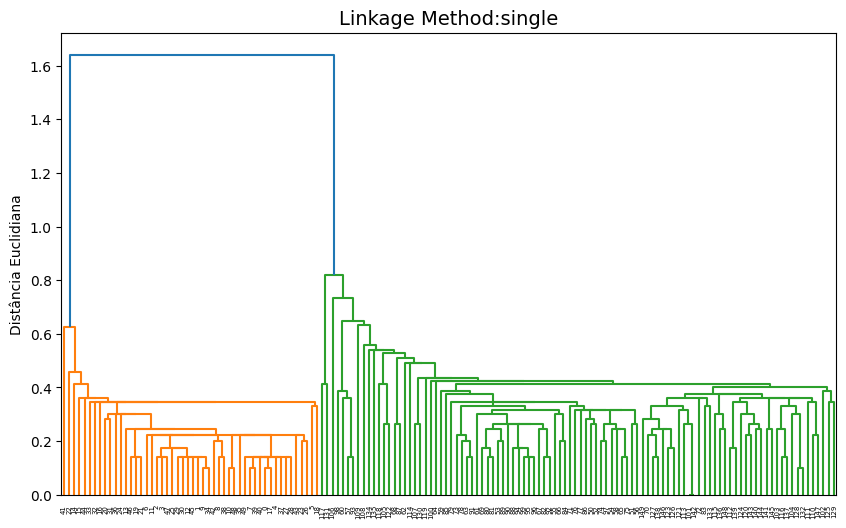

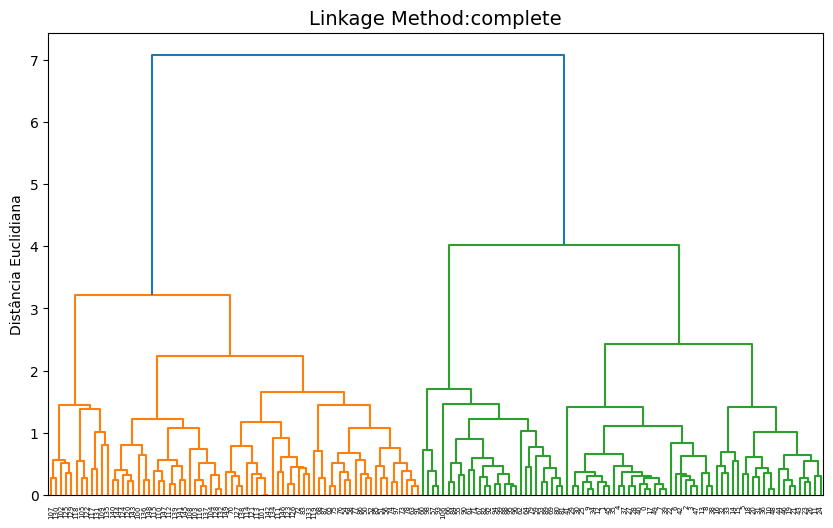

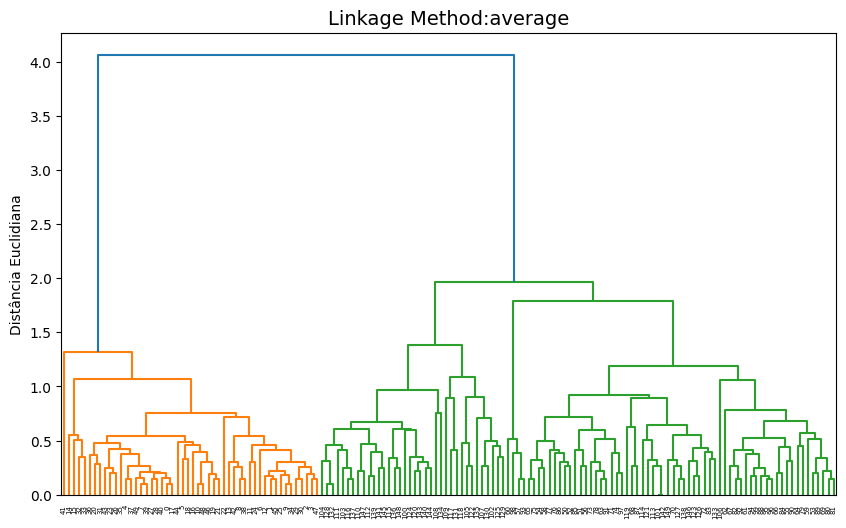

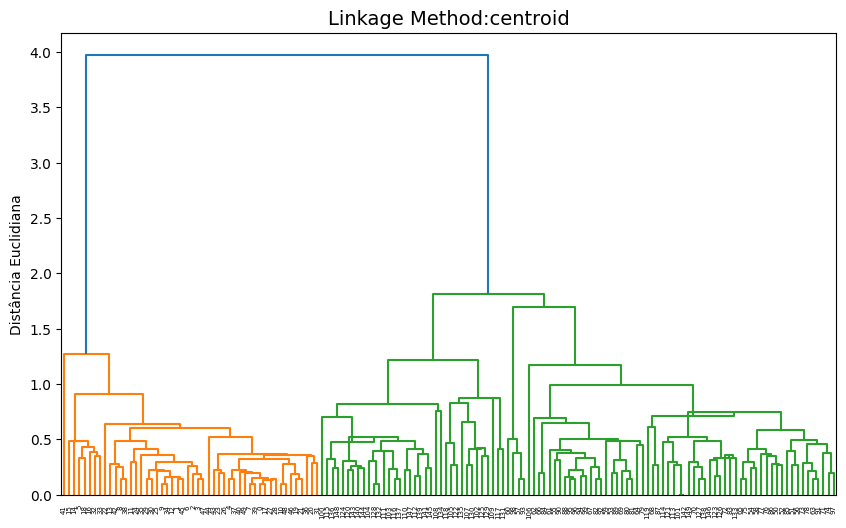

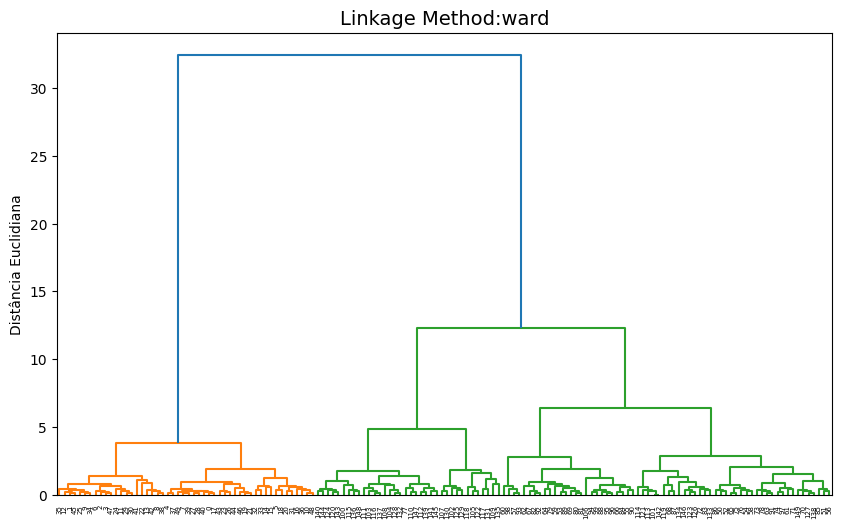

In [4]:
# executar clusterização para todos os métodos
methods = ['single', 'complete', 'average', 'centroid', 'ward']

for method in methods:
  plot_dendogram(data=data, method=method)

In [5]:
# montar o google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# procurar e carregar o arquivo
FILE_PATH = '/content/drive/MyDrive/Bootcamp_DataScience/AlgoritmosInteligenciaArtificialClassificacao/datasets/german_credit.csv'
data = pd.read_csv(FILE_PATH)
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [7]:
# modificar os nomes das colunas
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('(', '').\
  str.replace(')', '').str.replace('/', '_').str.replace('&', '')
data.head()

,creditability,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings_stocks,length_of_current_employment,instalment_per_cent,sex__marital_status,...,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [8]:
# não queremos a coluna de 'resposta' no cluster - creditability
data.drop(columns=['creditability'], inplace=True)
data.head(1)

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings_stocks,length_of_current_employment,instalment_per_cent,sex__marital_status,guarantors,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1


In [9]:
# checando todas as variáveis numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   account_balance                    1000 non-null   int64
 1   duration_of_credit_month           1000 non-null   int64
 2   payment_status_of_previous_credit  1000 non-null   int64
 3   purpose                            1000 non-null   int64
 4   credit_amount                      1000 non-null   int64
 5   value_savings_stocks               1000 non-null   int64
 6   length_of_current_employment       1000 non-null   int64
 7   instalment_per_cent                1000 non-null   int64
 8   sex__marital_status                1000 non-null   int64
 9   guarantors                         1000 non-null   int64
 10  duration_in_current_address        1000 non-null   int64
 11  most_valuable_available_asset      1000 non-null   int64
 12  age_years            

In [10]:
# como selecionar automaticamente apenas colunas numéricas?
x = data.select_dtypes(include=np.number)
x.head()

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings_stocks,length_of_current_employment,instalment_per_cent,sex__marital_status,guarantors,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [11]:
# função para o método da silhueta
def s_score(x: pd.DataFrame, n_clusters: int, link_method: str) -> float:

  # aplicar o escalonador
  scaler = RobustScaler()
  x_std = scaler.fit_transform(x)

  # aplicar o modelo nos dados (clusterização)
  cluster = AgglomerativeClustering(n_clusters=n_clusters,
                                    linkage=link_method)
  cluster.fit(x_std)

  # obtendo os grupos
  labels = cluster.labels_

  # calcula o score de silhueta
  return silhouette_score(x_std, labels)

In [12]:
data.describe()

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings_stocks,length_of_current_employment,instalment_per_cent,sex__marital_status,guarantors,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [13]:
# aplicando o método da silhueta várias vezes
n_clusters = range(2, 21)
s_score_dict = {
    'single': [],
    'complete': [],
    'ward': [],
    'average': []
}

for link in s_score_dict:
  for k in n_clusters:
    s_score_dict[link].append(s_score(x=data, n_clusters=k, link_method=link))

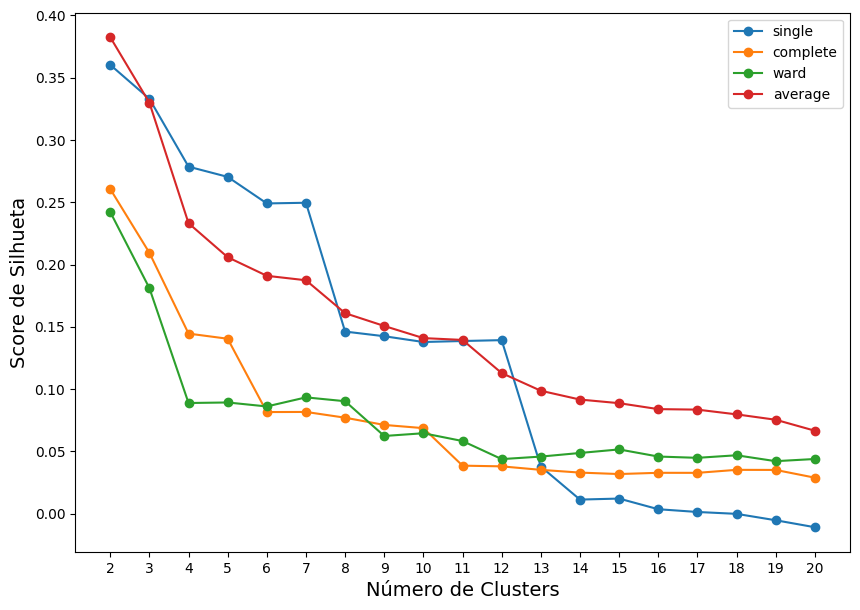

In [14]:
# construindo um gráfico de scores de silhueta
plt.figure(figsize=(10, 7))
for link in s_score_dict:
  plt.plot(n_clusters, s_score_dict[link], 'o-', label=link)
plt.xlabel('Número de Clusters', size=14)
plt.ylabel('Score de Silhueta', size=14)
plt.xticks(ticks=n_clusters, labels=n_clusters)
plt.legend(loc='best')
plt.show()

In [15]:
# modelagem definitiva
N_CLUSTER = 2
LINKAGE = 'average'

h_cluster = Pipeline([
    ('scaler', RobustScaler()),
    ('h_cluster', AgglomerativeClustering(n_clusters=N_CLUSTER, linkage=LINKAGE))
])

# atribuir os grupos
labels = h_cluster.fit_predict(data)

# criando uma cópia para análise
data_cluster = data.copy()
data_cluster['cluster'] = labels

In [16]:
# análise exploratória geral
data_cluster.groupby(['cluster']).describe().T

cluster                         0          1
account_balance count  989.000000  11.000000
                mean     2.581395   2.181818
                std      1.260060   0.981650
                min      1.000000   1.000000
                25%      1.000000   2.000000
...                           ...        ...
foreign_worker  min      1.000000   1.000000
                25%      1.000000   1.000000
                50%      1.000000   1.000000
                75%      1.000000   1.000000
                max      2.000000   2.000000

[160 rows x 2 columns]

- aparentemente temos alguma variável com distribuição categórica bem distinta que cria um viés no cluster

In [17]:
# análise exploratória por coluna - tentar identificar uma variável totalmente desbalanceada
for col in data_cluster.columns:
  if col not in ['duration_of_credit_month', 'credit_amount', 'age_years']:
    print(f'Avaliando a coluna {col}')
    print(data_cluster[col].value_counts())
    print('\n')

Avaliando a coluna account_balance
4    394
1    274
2    269
3     63
Name: account_balance, dtype: int64


Avaliando a coluna payment_status_of_previous_credit
2    530
4    293
3     88
1     49
0     40
Name: payment_status_of_previous_credit, dtype: int64


Avaliando a coluna purpose
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: purpose, dtype: int64


Avaliando a coluna value_savings_stocks
1    603
5    183
2    103
3     63
4     48
Name: value_savings_stocks, dtype: int64


Avaliando a coluna length_of_current_employment
3    339
5    253
4    174
2    172
1     62
Name: length_of_current_employment, dtype: int64


Avaliando a coluna instalment_per_cent
4    476
2    231
3    157
1    136
Name: instalment_per_cent, dtype: int64


Avaliando a coluna sex__marital_status
3    548
2    310
4     92
1     50
Name: sex__marital_status, dtype: int64


Avaliando a coluna guarantors
1    907
3     52
2     41
Name: guarantors,

# **Decisões de Projeto**

- **versão 1** - agrupador que considera as três variáveis númericas reais (age, credit amount e duration)

In [18]:
data.head()

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings_stocks,length_of_current_employment,instalment_per_cent,sex__marital_status,guarantors,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [19]:
# amostrando linhas para a primeira versão do conjunto
# do clusterizador
x1 = data[['duration_of_credit_month', 'credit_amount', 'age_years']]
x1.head()

,duration_of_credit_month,credit_amount,age_years
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


In [20]:
def apply_silhouette_analysis(data):

  # aplicando o método da silhueta várias vezes
  n_clusters = range(2, 21)
  s_score_dict = {
      'single': [],
      'complete': [],
      'ward': [],
      'average': []
  }

  for link in s_score_dict:
    for k in n_clusters:
      s_score_dict[link].append(s_score(x=data, n_clusters=k, link_method=link))

  # construindo um gráfico de scores de silhueta
  plt.figure(figsize=(10, 7))
  for link in s_score_dict:
    plt.plot(n_clusters, s_score_dict[link], 'o-', label=link)
  plt.xlabel('Número de Clusters', size=14)
  plt.ylabel('Score de Silhueta', size=14)
  plt.xticks(ticks=n_clusters, labels=n_clusters)
  plt.legend(loc='best')
  plt.axhline(y=0, ls='--', color='red')
  plt.show()

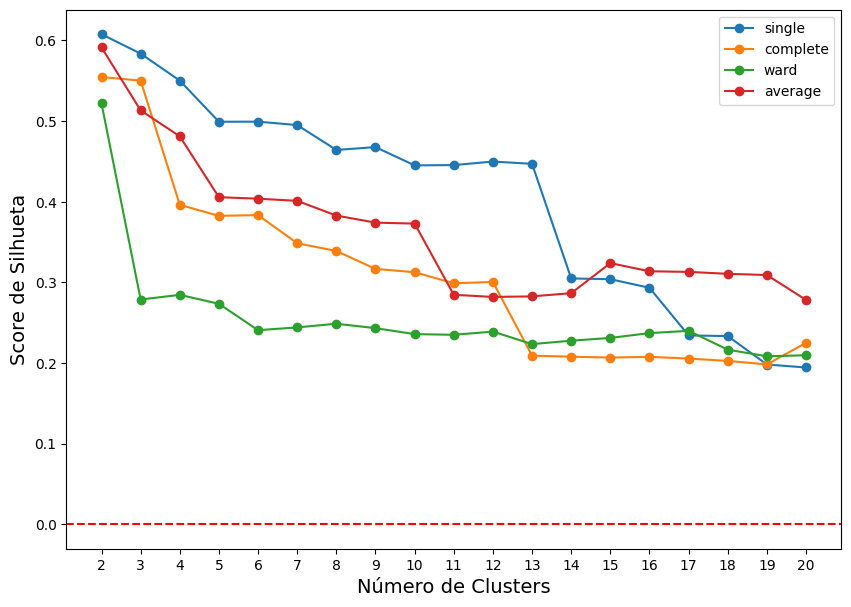

In [21]:
apply_silhouette_analysis(data=x1)

In [22]:
# modelagem definitiva
N_CLUSTER = 2
LINKAGE = 'single'

def apply_final_clustering(data, n_clusters, linkage):
  # construção do modelo
  h_cluster = Pipeline([
      ('scaler', RobustScaler()),
      ('h_cluster', AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage))
  ])

  # atribuir os grupos
  labels = h_cluster.fit_predict(data)

  # criando uma cópia para análise
  data_cluster = data.copy()
  data_cluster['cluster'] = labels

  return data_cluster

In [23]:
x1 = apply_final_clustering(data=x1, n_clusters=N_CLUSTER, linkage=LINKAGE)
x1.head()

,duration_of_credit_month,credit_amount,age_years,cluster
0,18,1049,21,0
1,9,2799,36,0
2,12,841,23,0
3,12,2122,39,0
4,12,2171,38,0


(array([445., 293.,  97.,  80.,  38.,  19.,  14.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <BarContainer object of 10 artists>)

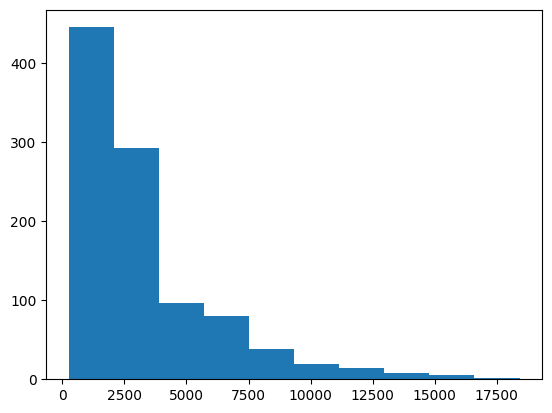

In [24]:
plt.hist(x1['credit_amount'])

In [25]:
# análise estatística descritiva
x1.groupby(['cluster']).describe().T

cluster                                    0        1
duration_of_credit_month count    999.000000      1.0
                         mean      20.917918      6.0
                         std       12.055619      NaN
                         min        4.000000      6.0
                         25%       12.000000      6.0
                         50%       18.000000      6.0
                         75%       24.000000      6.0
                         max       72.000000      6.0
credit_amount            count    999.000000      1.0
                         mean    3259.611612  14896.0
                         std     2800.066103      NaN
                         min      250.000000  14896.0
                         25%     1365.000000  14896.0
                         50%     2319.000000  14896.0
                         75%     3969.000000  14896.0
                         max    18424.000000  14896.0
age_years                count    999.000000      1.0
                         mean      35.509510     68.0
                         std       11.311745      NaN
                         min       19.000000     68.0
                         25%       27.000000     68.0
                         50%       33.000000     68.0
                         75%       42.000000     68.0
                         max       75.000000     68.0

In [26]:
# primeira tentativa - log dos credit amount
x1.drop(columns=['cluster'], inplace=True)
x1['credit_amount'] = np.log(x1['credit_amount'])

(array([  7.,  16.,  69., 175., 198., 194., 155., 109.,  55.,  22.]),
 array([5.52146092, 5.95145577, 6.38145062, 6.81144547, 7.24144033,
        7.67143518, 8.10143003, 8.53142488, 8.96141974, 9.39141459,
        9.82140944]),
 <BarContainer object of 10 artists>)

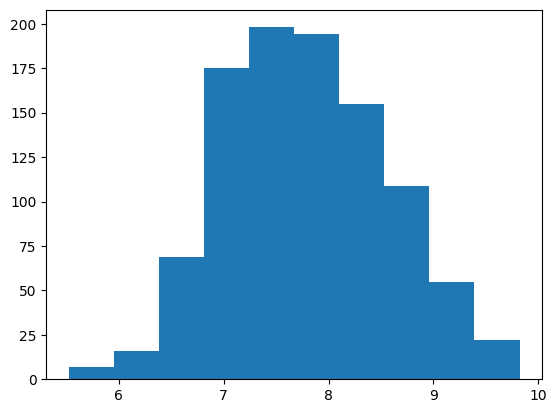

In [27]:
plt.hist(x1['credit_amount'])

In [28]:
# corrigir o nome da coluna
x1 = x1.rename(columns={'credit_amount': 'log_credit_amount'})

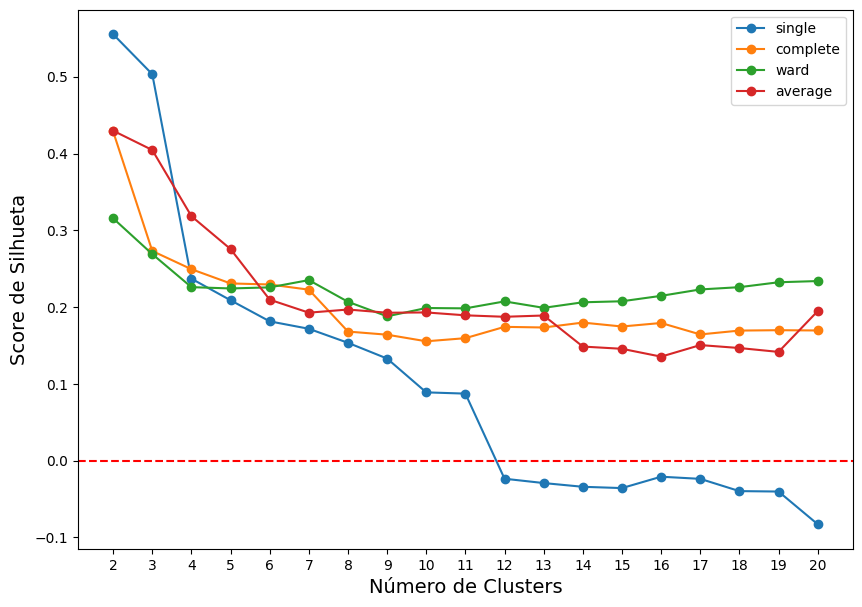

In [29]:
# aplicando novamente o método da silhueta
apply_silhouette_analysis(x1)

In [30]:
x1 = apply_final_clustering(data=x1, n_clusters=2, linkage='single')

# análise estatística descritiva
x1.groupby(['cluster']).describe().T

cluster                                  0          1
duration_of_credit_month count  999.000000   1.000000
                         mean    20.851852  72.000000
                         std     11.955834        NaN
                         min      4.000000  72.000000
                         25%     12.000000  72.000000
                         50%     18.000000  72.000000
                         75%     24.000000  72.000000
                         max     60.000000  72.000000
log_credit_amount        count  999.000000   1.000000
                         mean     7.787829   8.629629
                         std      0.776442        NaN
                         min      5.521461   8.629629
                         25%      7.218909   8.629629
                         50%      7.748891   8.629629
                         75%      8.286269   8.629629
                         max      9.821409   8.629629
age_years                count  999.000000   1.000000
                         mean    35.553554  24.000000
                         std     11.352473        NaN
                         min     19.000000  24.000000
                         25%     27.000000  24.000000
                         50%     33.000000  24.000000
                         75%     42.000000  24.000000
                         max     75.000000  24.000000

(array([171., 262., 337.,  57.,  86.,  17.,  54.,   2.,  13.,   1.]),
 array([ 4. , 10.8, 17.6, 24.4, 31.2, 38. , 44.8, 51.6, 58.4, 65.2, 72. ]),
 <BarContainer object of 10 artists>)

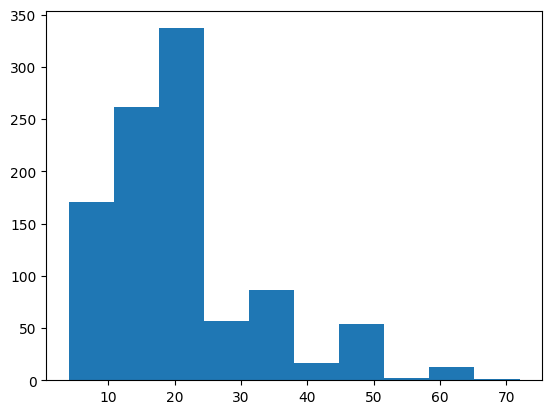

In [31]:
plt.hist(x1['duration_of_credit_month'])

(array([  7.,  80.,  56., 216.,  74., 153., 241.,  92.,  65.,  16.]),
 array([1.38629436, 1.67533154, 1.96436871, 2.25340589, 2.54244306,
        2.83148024, 3.12051742, 3.40955459, 3.69859177, 3.98762894,
        4.27666612]),
 <BarContainer object of 10 artists>)

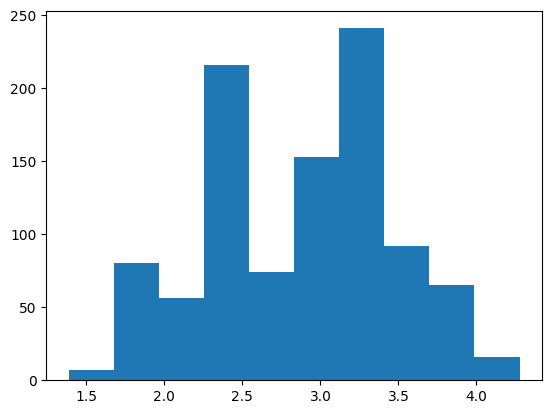

In [32]:
# log da duração do crédito
x1['log_duration_of_credit_month'] = np.log(x1['duration_of_credit_month'])
x1.drop(columns=['cluster', 'duration_of_credit_month'], inplace=True)
plt.hist(x1['log_duration_of_credit_month'])

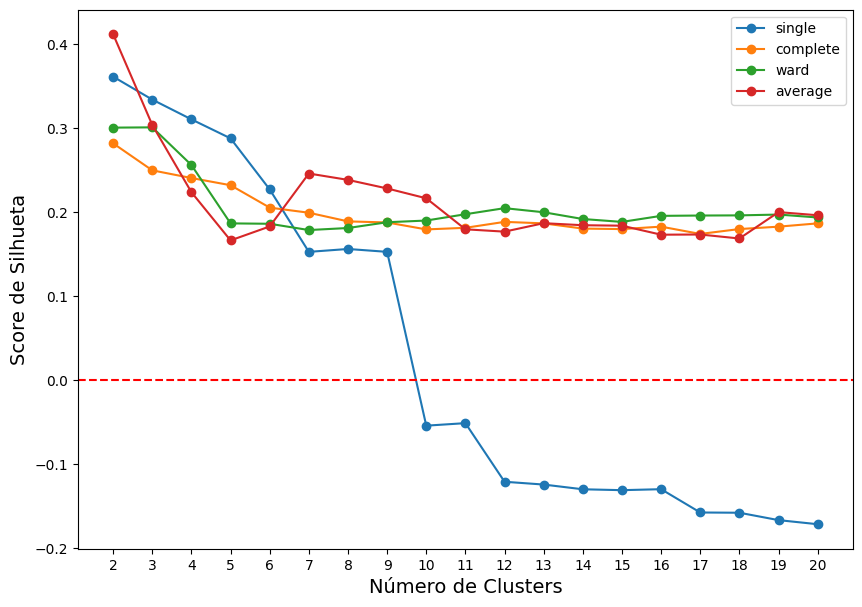

In [33]:
# aplicando novamente o método da silhueta
apply_silhouette_analysis(x1)

In [34]:
x1 = apply_final_clustering(data=x1, n_clusters=2, linkage='average')

# análise estatística descritiva
x1.groupby(['cluster']).describe().T

cluster                                      0          1
log_credit_amount            count  990.000000  10.000000
                             mean     7.787822   7.872666
                             std      0.774977   0.960911
                             min      5.521461   6.624065
                             25%      7.223478   7.176745
                             50%      7.749107   7.685516
                             75%      8.286647   8.469785
                             max      9.821409   9.608848
age_years                    count  990.000000  10.000000
                             mean    35.202020  69.200000
                             std     10.881083   4.894441
                             min     19.000000  62.000000
                             25%     27.000000  64.750000
                             50%     33.000000  69.000000
                             75%     41.000000  74.000000
                             max     75.000000  75.000000
log_duration_of_credit_month count  990.000000  10.000000
                             mean     2.886829   1.905703
                             std      0.576452   0.234084
                             min      1.386294   1.609438
                             25%      2.484907   1.791759
                             50%      2.890372   1.791759
                             75%      3.178054   2.095858
                             max      4.276666   2.302585

(array([ 30., 160., 142., 149., 175., 128.,  93.,  55.,  50.,  18.]),
 array([2.94443898, 3.08174389, 3.21904881, 3.35635372, 3.49365863,
        3.63096355, 3.76826846, 3.90557337, 4.04287829, 4.1801832 ,
        4.31748811]),
 <BarContainer object of 10 artists>)

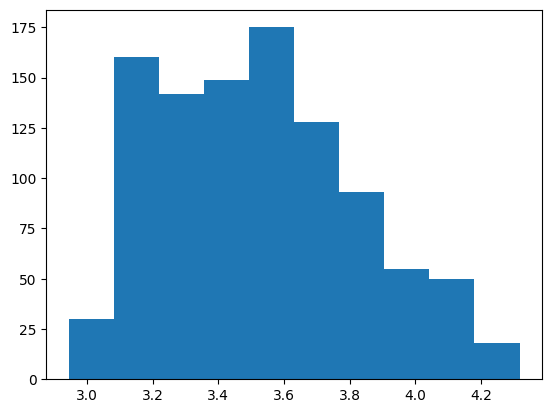

In [35]:
x1['log_age_years'] = np.log(x1['age_years'])
x1.drop(columns=['cluster', 'age_years'], inplace=True)
plt.hist(x1['log_age_years'])

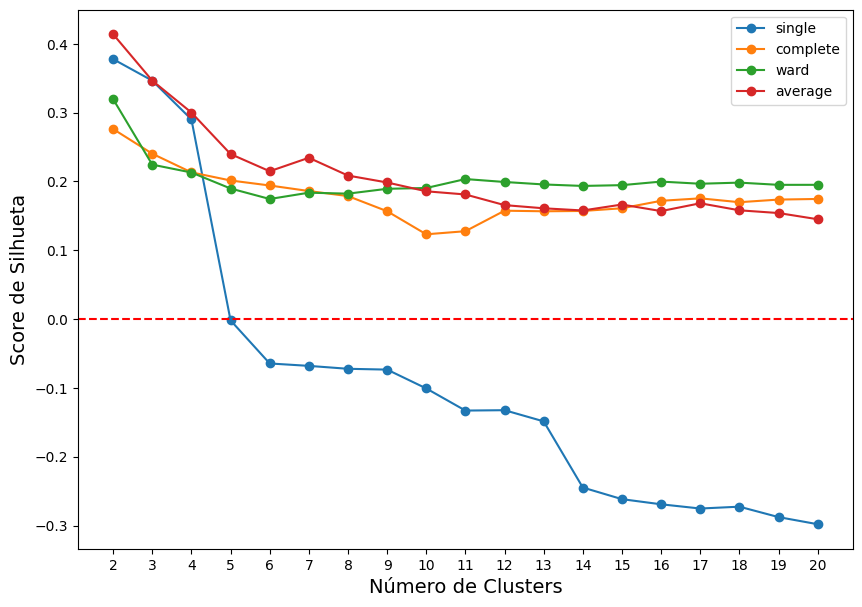

In [36]:
# aplicando novamente o método da silhueta
apply_silhouette_analysis(x1)

In [37]:
x1 = apply_final_clustering(data=x1, n_clusters=2, linkage='average')

# análise estatística descritiva
x1.groupby(['cluster']).describe().T

cluster                                    0           1
log_credit_amount            count  2.000000  998.000000
                             mean   9.597269    7.785046
                             std    0.016375    0.773047
                             min    9.585690    5.521461
                             25%    9.591479    7.218543
                             50%    9.597269    7.748028
                             75%    9.603058    8.285450
                             max    9.608848    9.821409
log_duration_of_credit_month count  2.000000  998.000000
                             mean   1.791759    2.879193
                             std    0.000000    0.580789
                             min    1.791759    1.386294
                             25%    1.791759    2.484907
                             50%    1.791759    2.890372
                             75%    1.791759    3.178054
                             max    1.791759    4.276666
log_age_years                count  2.000000  998.000000
                             mean   3.677501    3.524068
                             std    0.766513    0.298415
                             min    3.135494    2.944439
                             25%    3.406498    3.295837
                             50%    3.677501    3.496508
                             75%    3.948504    3.737670
                             max    4.219508    4.317488

Conclusões até o momento

- o modelo mais útil até o momento parece separar pessoas idosas de pessoas mais jovens. No entanto, ele ainda permanece muito desbalanceado, devido à diferença da quantidade de pessoas idosas x jovens.
- No entanto, as outras variáveis aparentemente não têm diferença estatística.

- **versão 2** - eliminar a idade do meu conjunto de dados.

In [38]:
# eliminando a idade do conjunto de dados
x1.drop(columns=['log_age_years', 'cluster'], inplace=True)

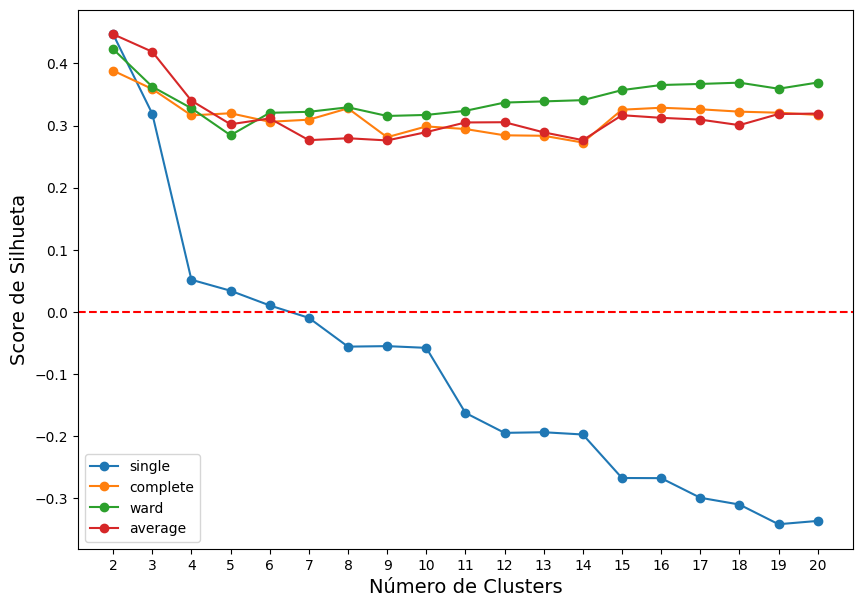

In [39]:
apply_silhouette_analysis(data=x1)

In [40]:
x1 = apply_final_clustering(data=x1, n_clusters=2, linkage='average')

# análise estatística descritiva
x1.groupby(['cluster']).describe().T

cluster                                      0         1
log_credit_amount            count  998.000000  2.000000
                             mean     7.785046  9.597269
                             std      0.773047  0.016375
                             min      5.521461  9.585690
                             25%      7.218543  9.591479
                             50%      7.748028  9.597269
                             75%      8.285450  9.603058
                             max      9.821409  9.608848
log_duration_of_credit_month count  998.000000  2.000000
                             mean     2.879193  1.791759
                             std      0.580789  0.000000
                             min      1.386294  1.791759
                             25%      2.484907  1.791759
                             50%      2.890372  1.791759
                             75%      3.178054  1.791759
                             max      4.276666  1.791759

In [41]:
# eliminar os "outliers" que foram para o cluster 1 - aparentement
# o alto valor requisitado de empréstimo caracterizou-os como
# outliers
x1 = x1.loc[x1['cluster']==0, :]
x1.drop(columns=['cluster'], inplace=True)

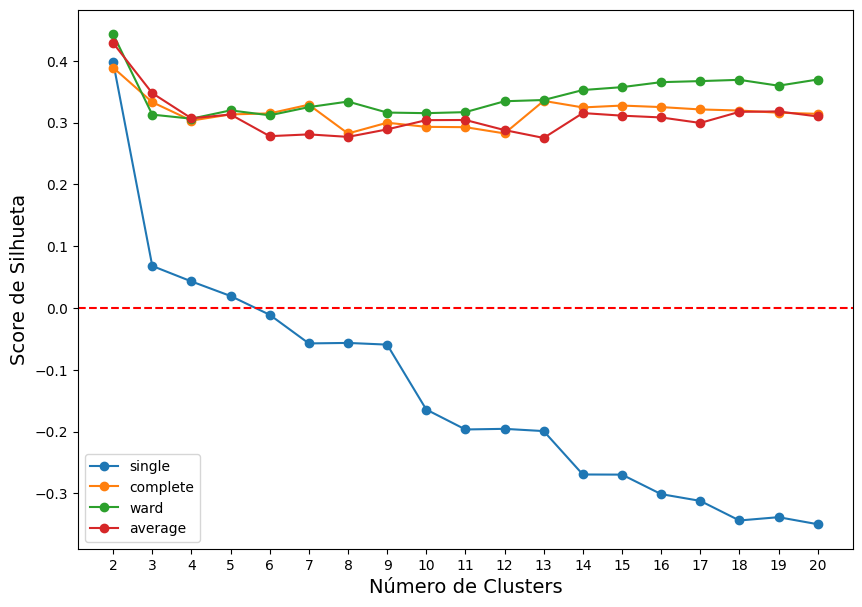

In [42]:
apply_silhouette_analysis(data=x1)

In [43]:
x1 = apply_final_clustering(data=x1, n_clusters=2, linkage='ward')

# análise estatística descritiva
x1.groupby(['cluster']).describe().T

cluster                                      0           1
log_credit_amount            count  489.000000  509.000000
                             mean     8.370563    7.222536
                             std      0.533019    0.502872
                             min      7.447168    5.521461
                             25%      7.928406    6.961296
                             50%      8.283747    7.225481
                             75%      8.774622    7.539559
                             max      9.821409    8.818926
log_duration_of_credit_month count  489.000000  509.000000
                             mean     3.312769    2.462653
                             std      0.370786    0.418500
                             min      2.302585    1.386294
                             25%      3.044522    2.197225
                             50%      3.178054    2.484907
                             75%      3.583519    2.708050
                             max      4.276666    3.583519

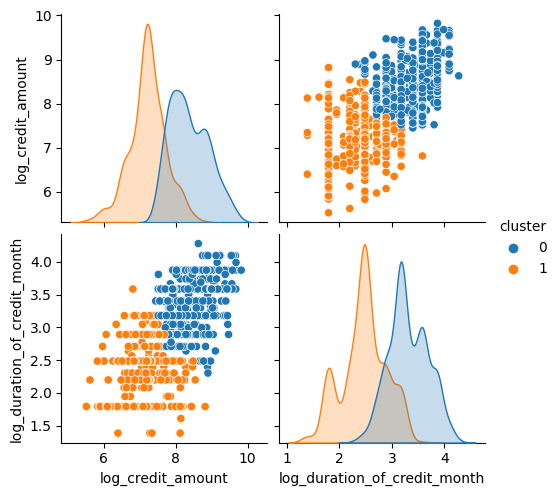

In [44]:
sns.pairplot(x1, hue='cluster')

- a eliminação / tratamento dos outliers e valores extremos permitiu termos um modelo útil ao negócio
- com esse modelo, conseguimos responder perguntas a respeito dos dois perfis identificados, com certa confiança estatística.

In [45]:
# para um cliente do grupo 1 - o log médio do valor de crédito (e qual o valor
# médio de crédito)
avg1 = x1.loc[x1['cluster']==1, 'log_credit_amount'].mean()

print(f'Log do empréstimo médio do grupo 1: {avg1}')
print(f'Valor do empréstimo médio do grupo 1: {np.exp(avg1)}')

Log do empréstimo médio do grupo 1: 7.222536029936867
Valor do empréstimo médio do grupo 1: 1369.9589158431713


In [46]:
# para um cliente do grupo 0 - o log médio do valor de crédito (e qual o valor
# médio de crédito)
avg0 = x1.loc[x1['cluster']==0, 'log_credit_amount'].mean()

print(f'Log do empréstimo médio do grupo 0: {avg0}')
print(f'Valor do empréstimo médio do grupo 0: {np.exp(avg0)}')

Log do empréstimo médio do grupo 0: 8.370563259811604
Valor do empréstimo médio do grupo 0: 4318.067571774429


- **versão 3** - vamos tentar voltar a idade para nosso problema

In [47]:
# usando a operação de junção para pegar a coluna de idade novamente
# sem a necessidade de identificar explicitamente quais foram os
# outliers removidos (a correspondência é feito via índices)
x3 = x1.join(data[['age_years']])
x3.drop(columns=['cluster'], inplace=True)

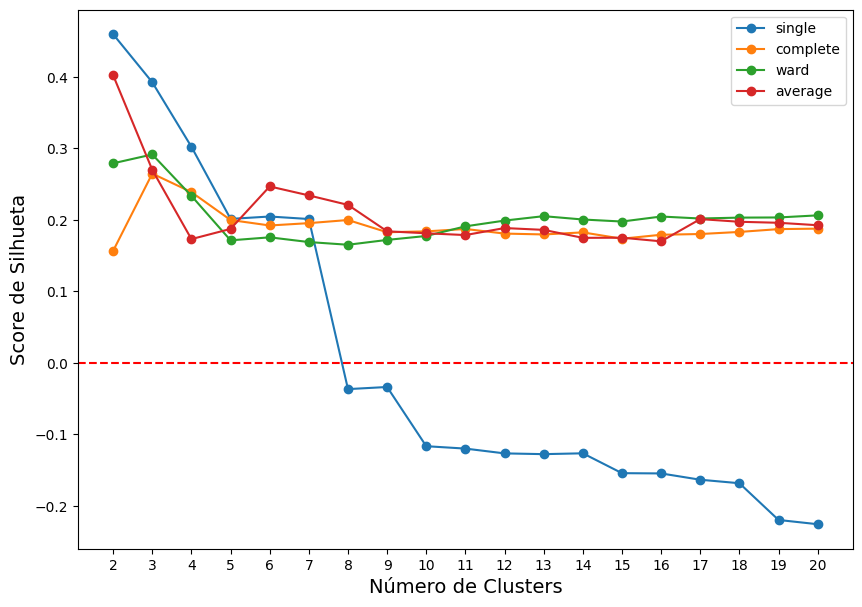

In [48]:
apply_silhouette_analysis(data=x3)

In [49]:
x3 = apply_final_clustering(data=x3, n_clusters=2, linkage='single')

# análise estatística descritiva
x3.groupby(['cluster']).describe().T

cluster                                      0          1
log_credit_amount            count  997.000000   1.000000
                             mean     7.784685   8.145550
                             std      0.773351        NaN
                             min      5.521461   8.145550
                             25%      7.218177   8.145550
                             50%      7.747165   8.145550
                             75%      8.285513   8.145550
                             max      9.821409   8.145550
log_duration_of_credit_month count  997.000000   1.000000
                             mean     2.880466   1.609438
                             std      0.579685        NaN
                             min      1.386294   1.609438
                             25%      2.484907   1.609438
                             50%      2.890372   1.609438
                             75%      3.178054   1.609438
                             max      4.276666   1.609438
age_years                    count  997.000000   1.000000
                             mean    35.483450  74.000000
                             std     11.250211        NaN
                             min     19.000000  74.000000
                             25%     27.000000  74.000000
                             50%     33.000000  74.000000
                             75%     42.000000  74.000000
                             max     75.000000  74.000000

- **Decisão de modelagem** - vamos analisar apenas pessoas até 50 anos. Motivo: temos poucas pessoas idosas (50 +) e isso torna o modelo enviesado. Exemplo: na última clusterização, tivemos um único elemento colocado em um perfil separado. Se a faixa idosa (50+) for de interesse do negócio, o melhor a ser feito seria coletar mais amostras para esse conjunto e construir um modelo separado.

In [50]:
# eliminando pessoas acima de 50 anos
x3 = x3.loc[x3['age_years'] <= 50, :]
x3.drop(columns=['cluster'], inplace=True)

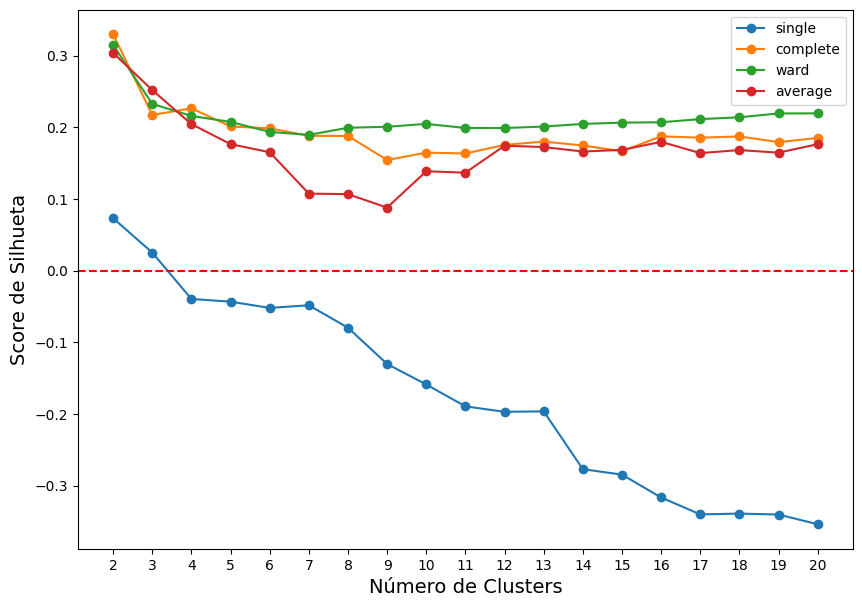

In [51]:
apply_silhouette_analysis(data=x3)

In [52]:
x3 = apply_final_clustering(data=x3, n_clusters=2, linkage='complete')

# análise estatística descritiva
x3.groupby(['cluster']).describe().T

cluster                                      0           1
log_credit_amount            count  379.000000  507.000000
                             mean     7.264803    8.190982
                             std      0.582667    0.631765
                             min      5.521461    6.812345
                             25%      6.933421    7.751045
                             50%      7.234177    8.156223
                             75%      7.623854    8.683449
                             max      9.102532    9.821409
log_duration_of_credit_month count  379.000000  507.000000
                             mean     2.350706    3.289853
                             std      0.344815    0.340542
                             min      1.386294    2.708050
                             25%      2.197225    3.044522
                             50%      2.484907    3.178054
                             75%      2.484907    3.583519
                             max      3.178054    4.276666
age_years                    count  379.000000  507.000000
                             mean    32.978892   32.216963
                             std      8.454333    7.176782
                             min     19.000000   20.000000
                             25%     26.000000   26.000000
                             50%     32.000000   31.000000
                             75%     39.000000   37.000000
                             max     50.000000   50.000000

- verificamos que os perfis de idade de ambos os clusters ficaram exatamente iguais. Sabendo que isso foi obtido depois de se eliminar as pessoas idosas, então podemos inferir que a informação útil de negócio com relação à idade dos clientes se encontrava exatamente na comparação de pessoas idosas (neste caso, 50+) com as jovens.
- O maior problema que limitava a nossa análise era que haviam poucas amostras de pessoas idosas (pouco mais de 10 %), o que dificultava a análise
- **Ação:** se a informação de idade for realmente crucial para o negócio, mais amostras do grupo dos idosos são necessárias.

In [53]:
data.head()

,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings_stocks,length_of_current_employment,instalment_per_cent,sex__marital_status,guarantors,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


- **versão 4**: queremos realizar o perfil incluindo o saldo da conta (`account_balance`)

In [56]:
# vamos recuperar a base de dados que não considerava a idade (x1)
# e vamos incluir a informação do account balance
x4 = x1.join(data[['account_balance']])
x4.drop(columns=['cluster'], inplace=True)
x4.head()

,log_credit_amount,log_duration_of_credit_month,account_balance
0,6.955593,2.890372,1
1,7.937017,2.197225,1
2,6.734592,2.484907,2
3,7.660114,2.484907,1
4,7.682943,2.484907,1


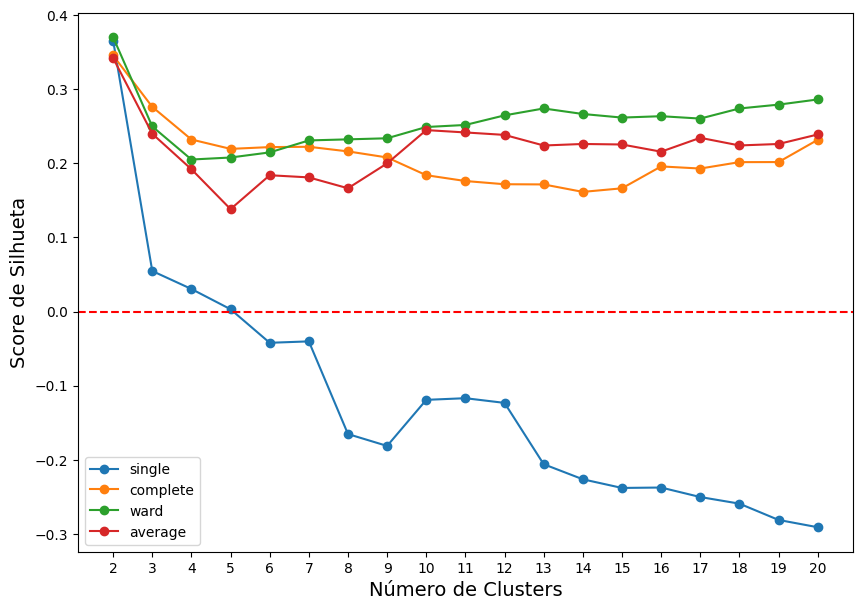

In [57]:
apply_silhouette_analysis(data=x4)

In [58]:
x4 = apply_final_clustering(data=x4, n_clusters=2, linkage='ward')

# análise estatística descritiva
x4.groupby(['cluster']).agg(func=[np.min, np.max, 'count']).T

cluster                                      0           1
log_credit_amount            amin     5.521461    7.506042
                             amax     9.102532    9.821409
                             count  609.000000  389.000000
log_duration_of_credit_month amin     1.386294    2.708050
                             amax     3.583519    4.276666
                             count  609.000000  389.000000
account_balance              amin     1.000000    1.000000
                             amax     4.000000    4.000000
                             count  609.000000  389.000000

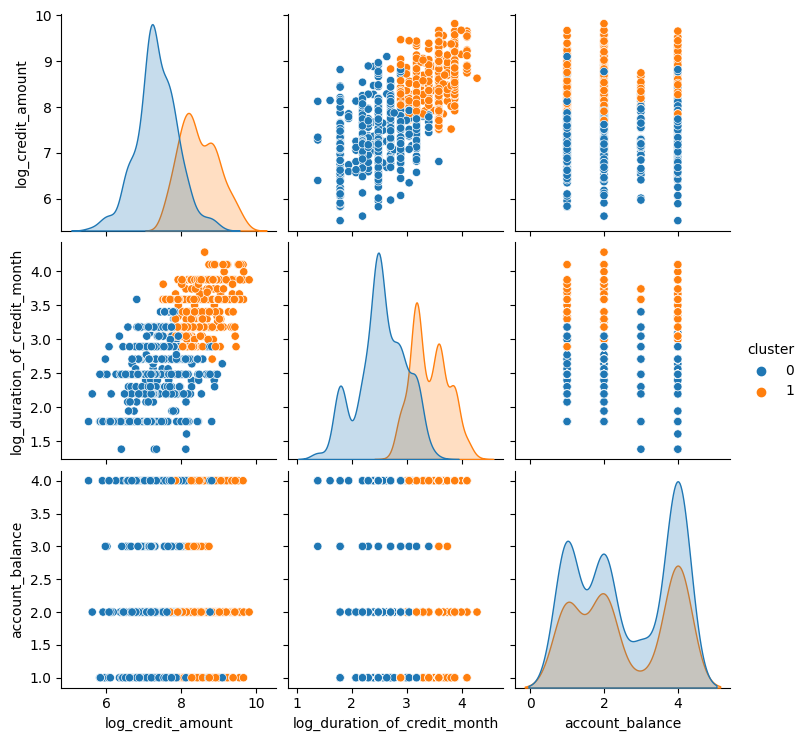

In [59]:
sns.pairplot(x4, hue='cluster')

In [60]:
# tabela de contingências
tabela_conting = pd.crosstab(x4['cluster'], x4['account_balance'])
tabela_conting

account_balance,1,2,3,4
cluster,,,,
0,168,152,50,239
1,105,116,13,155


In [61]:
# confirmando com o teste do Qui-Quadrado (alpha = 0.05)
chi2, p, _, _ = chi2_contingency(tabela_conting)

print(f'Estatística: {chi2}')
print(f'p-valor: {p}')

Estatística: 11.053197723549477
p-valor: 0.011441665969450818


- O teste do $\chi^2$ apresenta evidência estatística de que existe uma correlação entre o valor de `account_balance` e qual o perfil que o cliente vai ser alocado.

- analisando-se a tabela de contingências verifica-se que o cluster 0 tende a ter pessoas de `account_balance=3`, principalmente, com alguns elementos dos grupos 1 e 4.
- por outro lado, pessoas de `account_balance=2`, tendem a se distribuir de forma mais homogênea entre os clusters 0 e 1

In [62]:
x4.groupby(['cluster'])['account_balance'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,609.0,2.591133,1.257342,1.0,1.0,2.0,4.0,4.0
1,389.0,2.560411,1.259838,1.0,1.0,2.0,4.0,4.0


- Conclusões da versão 4: aparentemente temos os mesmos perfils de duração de crédito e de valor do crédito, com uma tendência do cluster 0 (longa duração e altos valores de crédito) de possuir pessoas dos `account_balance` dos grupos 3 e 4. O teste do $\chi^2$ apresentou evidência de que existe uma correlação (p-valor= 1%)
- **Ação**: confirmar se existe diferença estatística entre cada nível do `account_balance` entre os clusters.

In [63]:
# amostrar cada grupo de account balance
tabela_conting

account_balance,1,2,3,4
cluster,,,,
0,168,152,50,239
1,105,116,13,155


In [64]:
# contando totais de linhas
grupo0_total = x4.loc[x4['cluster']==0, :].shape[0]
grupo1_total = x4.loc[x4['cluster']==1, :].shape[0]

# vamos fazer para account_balance = 1 - contando quantas linhas estão com account_balance = 1
# E ao mesmo tempo, em cada cluster
grupo0_success = x4.loc[((x4['cluster']==0) & (x4['account_balance']==1)), :].shape[0]
grupo1_success = x4.loc[((x4['cluster']==1) & (x4['account_balance']==1)), :].shape[0]

# teste de diferenças de proporções (alpha = 0.05)
z_stat, p = sm.stats.proportions_ztest(
    [grupo0_success, grupo1_success],
    [grupo0_total, grupo1_total]
)

print(f'Estatística: {z_stat}')
print(f'p-valor: {p}')

Estatística: 0.20527005292665543
p-valor: 0.8373611401562435


- O teste estatístico de comparação de proporções mostra como conclusão que, se você tiver o `account_balance=1`, não existe tendência de atribuição a nenhum perfil. Ou seja, não são as pessoas desse grupo que determinam o perfil mostrado pela clusterização.

In [67]:
# vamos fazer para outros account_balance

for acc in x4['account_balance'].unique():

  # contando quantas linhas estão com account_balance = acc
  # E ao mesmo tempo, em cada cluster
  grupo0_success = x4.loc[((x4['cluster']==0) & (x4['account_balance']==acc)), :].shape[0]
  grupo1_success = x4.loc[((x4['cluster']==1) & (x4['account_balance']==acc)), :].shape[0]

  # teste de diferenças de proporções (alpha = 0.05)
  z_stat, p = sm.stats.proportions_ztest(
      [grupo0_success, grupo1_success],
      [grupo0_total, grupo1_total]
  )

  print(f'Análise de Comparação Estatística para o Account Balance = {acc}')
  print('-'*200)
  print(f'Proporção de AccBalance = {acc} no grupo 0: {round(grupo0_success * 100/ grupo0_total, 2)} %')
  print(f'Proporção de AccBalance = {acc} no grupo 1: {round(grupo1_success * 100/ grupo1_total, 2)} %')
  print(f'Estatística: {z_stat}')
  print(f'p-valor: {p}\n')

Análise de Comparação Estatística para o Account Balance = 1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Proporção de AccBalance = 1 no grupo 0: 27.59 %
Proporção de AccBalance = 1 no grupo 1: 26.99 %
Estatística: 0.20527005292665543
p-valor: 0.8373611401562435

Análise de Comparação Estatística para o Account Balance = 2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Proporção de AccBalance = 2 no grupo 0: 24.96 %
Proporção de AccBalance = 2 no grupo 1: 29.82 %
Estatística: -1.6898752791581593
p-valor: 0.09105181795017271

Análise de Comparação Estatística para o Account Balance = 4
--------------------------------------------------------------------------------------------------

**Conclusões do Estudo de Comparação Estatística**

- as pessoas classificadas nos extremos dos `account_balance` (grupos 1 e 4) tendem a se distribuir aleatoriamente entre os grupos identificados, visto que os testes de diferença estatística de proporções mostraram resultados não significativos
- para o grupo 2, apesar de ele não ser significativo com 95 % de confiança, podemos observar uma leve tendência de pessoas se concentrarem no grupo 1, que é o representativo de empréstimos mais arrojados (longas durações e altos volumes)
- para o grupo 3, finalmente, observamos uma relação significativa de forma a apontar que as pessoas tendem a se concentrar no grupo 1, que representa os empréstimos mais modestos (baixas durações e volumes). A análise mostrou uma proporção praticamente do triplo de pessoas no grupo 0, em relação ao grupo 1, sendo significativo a 95 % de confiança.

**Perfis Identificados do Cliente**

- *Grupo 1*
  - empréstimos com maiores durações
  - empréstimos com maiores volumes
  - account balance preferencialmente na classe 2, podendo haver as outras classes
- *Grupo 0*
  - empréstimos com menores durações (4 - 36)
  - empréstimos com menores volumes (250 - 9000)
  - account balance preferencialmente na classe 3, podendo haver as outras classes